In [221]:

pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [222]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller
from scipy.stats import linregress

In [223]:
BTC = yf.download('BTC-USD', start='2022-12-22', end='2022-12-23',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [224]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-22 00:00:00+00:00,16818.380859,16818.380859,16818.380859,16818.380859,16818.380859,0
2022-12-22 00:01:00+00:00,16825.763672,16825.763672,16825.763672,16825.763672,16825.763672,0
2022-12-22 00:02:00+00:00,16824.031250,16824.031250,16824.031250,16824.031250,16824.031250,1409024
2022-12-22 00:03:00+00:00,16829.160156,16829.160156,16829.160156,16829.160156,16829.160156,0
2022-12-22 00:04:00+00:00,16829.492188,16829.492188,16829.492188,16829.492188,16829.492188,0
...,...,...,...,...,...,...
2022-12-22 23:55:00+00:00,16828.492188,16828.492188,16828.492188,16828.492188,16828.492188,17562624
2022-12-22 23:56:00+00:00,16829.121094,16829.121094,16829.121094,16829.121094,16829.121094,0
2022-12-22 23:57:00+00:00,16828.197266,16828.197266,16828.197266,16828.197266,16828.197266,0


In [225]:
BTC.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1.435000e+03
mean,16787.848963,16787.848963,16787.848963,16787.848963,16787.848963,3.642489e+06
std,78.937596,78.937596,78.937596,78.937596,78.937596,1.068672e+07
min,16592.408203,16592.408203,16592.408203,16592.408203,16592.408203,0.000000e+00
25%,16774.234375,16774.234375,16774.234375,16774.234375,16774.234375,0.000000e+00
50%,16824.460938,16824.460938,16824.460938,16824.460938,16824.460938,4.618240e+05
75%,16843.041016,16843.041016,16843.041016,16843.041016,16843.041016,3.305984e+06
max,16866.673828,16866.673828,16866.673828,16866.673828,16866.673828,2.121585e+08


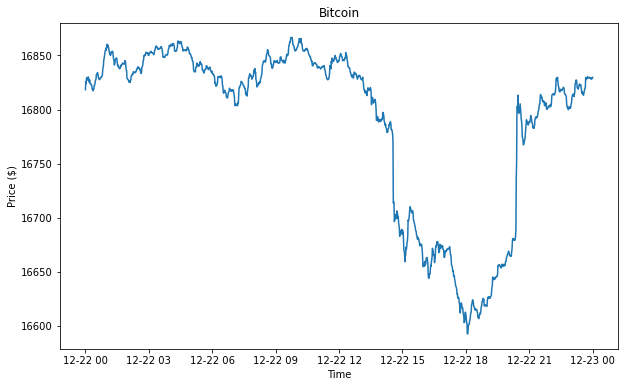

In [226]:
fig = plt.figure(figsize=(10, 6))
plt.plot(BTC['Close'])
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.title('Bitcoin');

In [227]:
ETH = yf.download('ETH-USD', start='2022-12-22', end='2022-12-23',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [228]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-22 00:00:00+00:00,1213.672607,1213.672607,1213.672607,1213.672607,1213.672607,0
2022-12-22 00:01:00+00:00,1214.051025,1214.051025,1214.051025,1214.051025,1214.051025,0
2022-12-22 00:02:00+00:00,1213.826782,1213.826782,1213.826782,1213.826782,1213.826782,0
2022-12-22 00:03:00+00:00,1214.177002,1214.177002,1214.177002,1214.177002,1214.177002,5888
2022-12-22 00:04:00+00:00,1214.120728,1214.120728,1214.120728,1214.120728,1214.120728,0
...,...,...,...,...,...,...
2022-12-22 23:55:00+00:00,1218.341797,1218.341797,1218.341797,1218.341797,1218.341797,4136960
2022-12-22 23:56:00+00:00,1218.353638,1218.353638,1218.353638,1218.353638,1218.353638,508416
2022-12-22 23:57:00+00:00,1218.216064,1218.216064,1218.216064,1218.216064,1218.216064,1118208


In [229]:
ETH.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1.435000e+03
mean,1209.560254,1209.560254,1209.560254,1209.560254,1209.560254,1.743503e+06
std,10.528285,10.528285,10.528285,10.528285,10.528285,7.444546e+06
min,1187.127808,1187.127808,1187.127808,1187.127808,1187.127808,0.000000e+00
25%,1210.714417,1210.714417,1210.714417,1210.714417,1210.714417,0.000000e+00
50%,1214.487427,1214.487427,1214.487427,1214.487427,1214.487427,2.718720e+05
75%,1216.548584,1216.548584,1216.548584,1216.548584,1216.548584,1.272576e+06
max,1221.986816,1221.986816,1221.986816,1221.986816,1221.986816,1.765980e+08


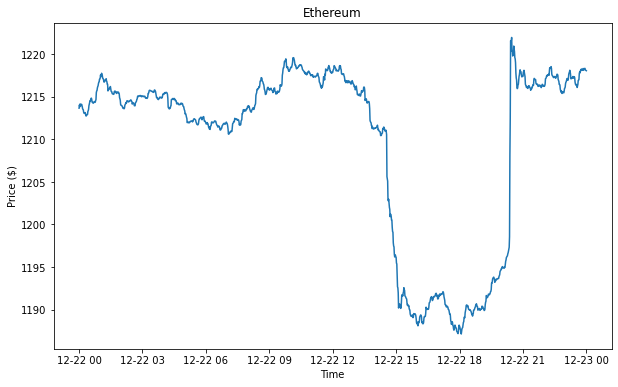

In [230]:
fig = plt.figure(figsize=(10, 6))
plt.plot(ETH['Close'])
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.title('Ethereum');

In [231]:
S1_0 = BTC['Open'][0]
S2_0 = ETH['Open'][0]

In [232]:
S1_0

16818.380859375

In [233]:
S2_0

1213.672607421875

In [234]:
result = linregress(np.log(BTC['Adj Close']), np.log(ETH['Adj Close']))
#result = linregress(BTC.values[:, 0], ETH.values[:, 0])
beta = result.slope
result

LinregressResult(slope=1.7714539464779644, intercept=-10.135437724378527, rvalue=0.9547031537524072, pvalue=0.0, stderr=0.014585213927402746, intercept_stderr=0.14189080512956817)

In [235]:
#Augmented Dickey-Fuller Test
residuals=BTC['Adj Close']-beta*ETH['Adj Close']
#residuals=BTC.values[:, 0]-result.slope*BTC.values[:, 0]
adf = ts.adfuller(residuals)
adf

(-1.1459033000742678,
 0.6964235873421647,
 6,
 1428,
 {'1%': -3.4349376007389965,
  '5%': -2.8635661096787812,
  '10%': -2.567848688436159},
 6674.690703910628)

In [236]:
lr1 = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
lr2 = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
mu_1 = lr1.mean() * 1435
mu_2 = lr2.mean() * 1435
sigma_1 = lr1.std() * np.sqrt(1435)
sigma_2 = lr2.std() * np.sqrt(1435)
rho = lr1.corr(lr2)
z_0 = 0.00
beta = 1.77
gamma = 0.5
delta = 1
T = 1
M = len(ETH)


In [237]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [238]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = BTC['Adj Close'][t-1]
    S2[t] = ETH['Adj Close'][t-1]

Text(0.5, 1.0, 'Stock Price')

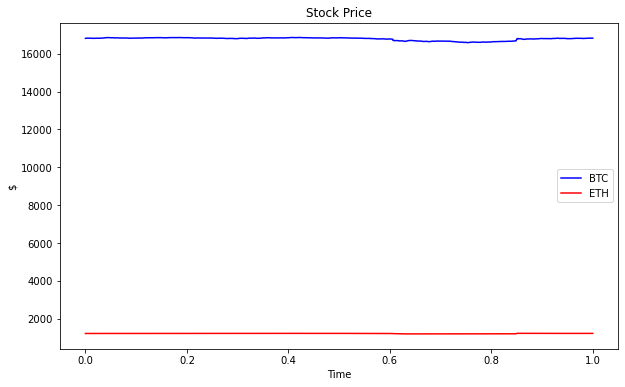

In [239]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='BTC')
plt.plot(tt, S2, 'r', lw=1.5, label='ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

Text(0.5, 1.0, 'z')

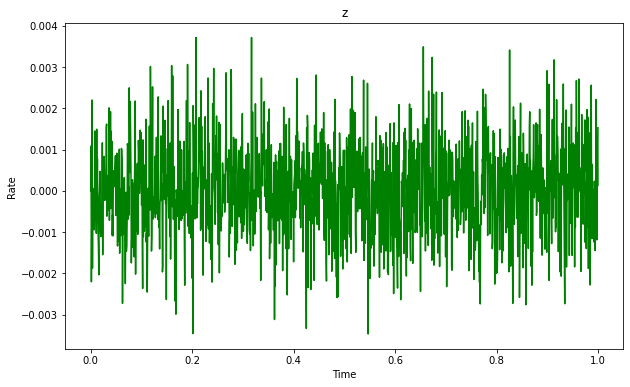

In [240]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [241]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

In [271]:
Pi_1.mean()

-0.003724625680667979

Text(0.5, 1.0, 'Weights')

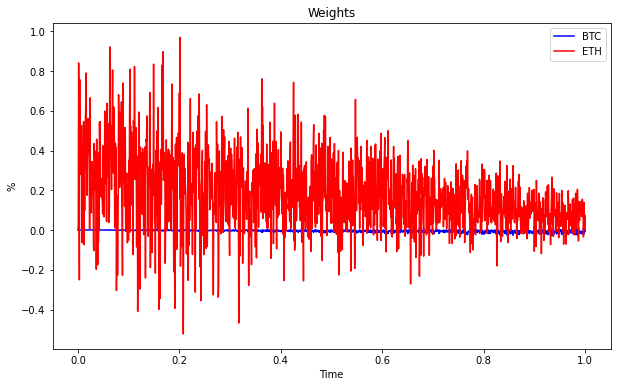

In [242]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='BTC')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

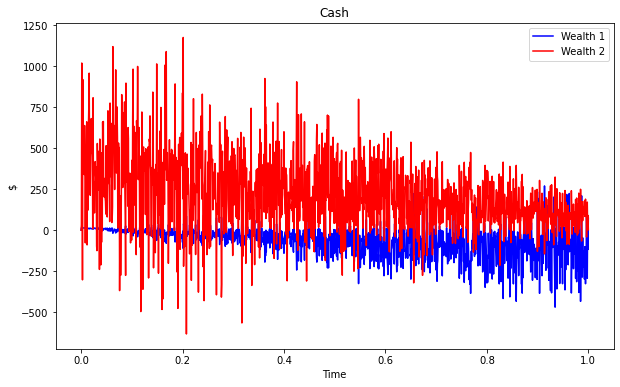

In [243]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [244]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

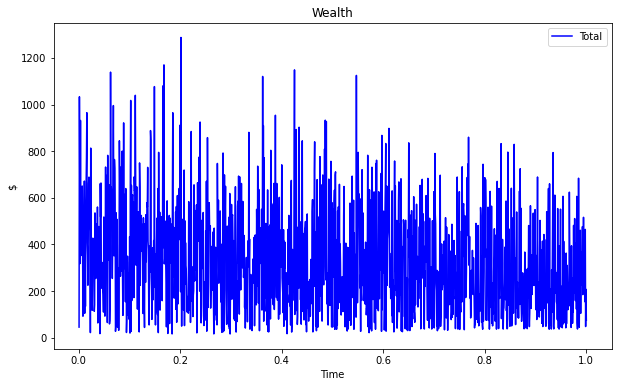

In [245]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [246]:
Wealth[1]

array([45.44586737])

In [247]:
Wealth[-1]

array([74.88251901])

In [248]:
(Wealth[-1] - Wealth[1])/Wealth[1]

array([0.64773])

Text(0.5, 1.0, 'Comparison')

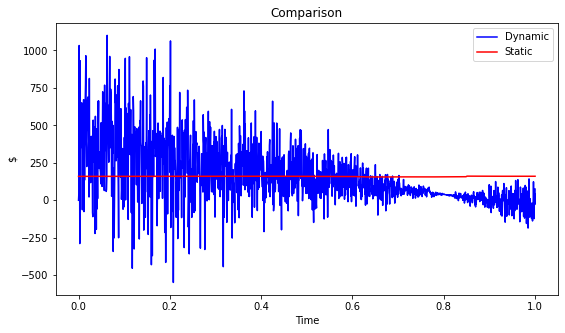

In [249]:
plt.figure(figsize=(9, 5))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

In [250]:
Pi_1.mean()


-0.00347777744674843

In [251]:
Pi_2.mean()

0.17978001789647308

In [281]:
#Get one simulation of two assets, redo the previous steps and show the two optimal control factors. (Figure needed)
#No. Still use BTC and ETH, but use the parameter you estimate to get the simulation path instead of the real time series.

S1_0 = 16872
S2_0 = 1242
mu_1 = 0.01
mu_2 = 0.02
sigma_1 = 0.05
sigma_2 = 0.1
z_0 = 0.01
beta = 1
gamma = 0.7
delta = 1
phi = 0.03
rho = -0.7
T = 1
M = 1460

In [282]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [283]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = S1[t-1] * np.exp((mu_1 + delta * z[t] - sigma_1 ** 2 / 2) * dt + sigma_1 * np.sqrt(dt) * rn1[t])
    S2[t] = S2[t-1] * np.exp((mu_2 - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))

Text(0.5, 1.0, 'Stock Price')

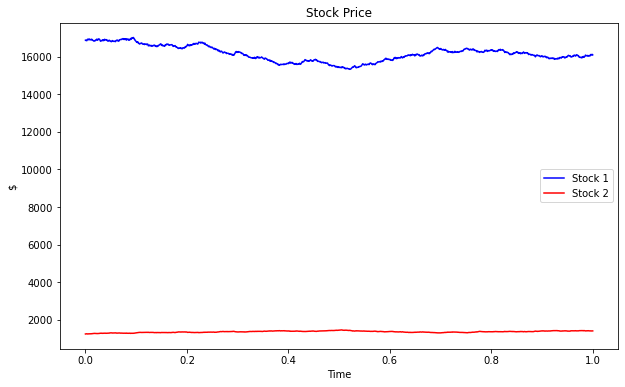

In [284]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Stock 1')
plt.plot(tt, S2, 'r', lw=1.5, label='Stock 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

Text(0.5, 1.0, 'Alpha')

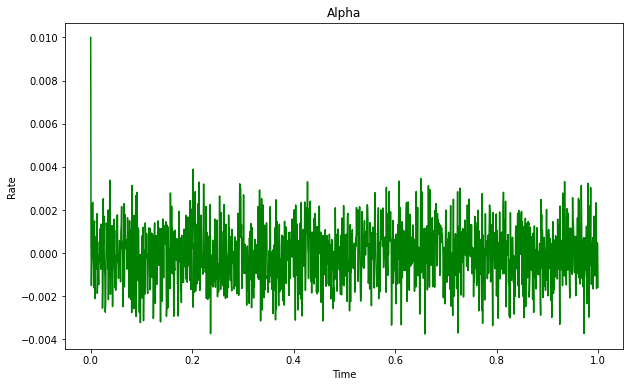

In [285]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Alpha')

In [286]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

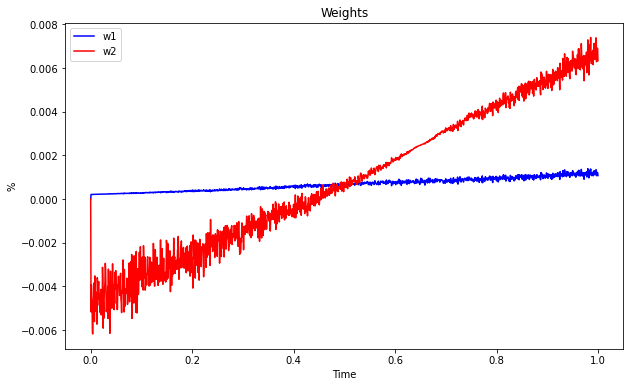

In [287]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

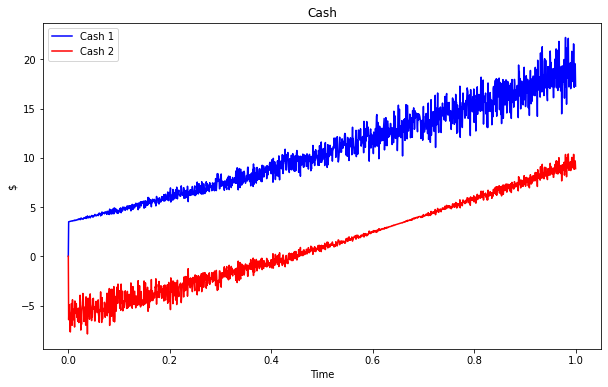

In [288]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Cash 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Cash 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

Text(0.5, 1.0, 'Comparison')

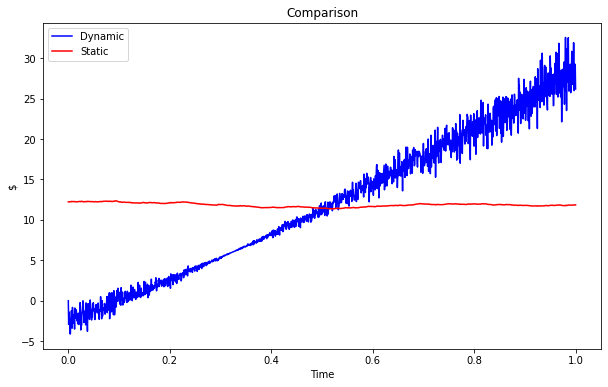

In [289]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

In [299]:
Pi_1.mean()

0.0006643527919592307

In [297]:
Pi_2.mean()

0.0008242800934726213